In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [296]:
# load the csv into a dataframe
bike_df = pd.read_csv('bike_crash (1) (1).csv')
bike_df

,$1000 Damage to Any One Persons Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No Data,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,40,Dry,Signal Light,Cloudy,Not Worn
2459,No,No,True,No Data,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Clear,Not Worn
2460,No,No,True,No Data,No,Not Injured,737,0,2017,Thursday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,30,Wet,Signal Light,Rain,Not Worn
2461,Yes,No,True,No Data,No,Non-Incapacitating Injury,930,1,2017,Friday,No Data,Intersection,Daylight,City Street,Main/Proper Lane,-1,Dry,Stop Sign,Clear,"Worn, Unk Damage"


In [297]:
bike_df.isnull().sum()


$1000 Damage to Any One Persons Property    0
Active School Zone Flag                     0
At Intersection Flag                        0
Average Daily Traffic Amount                0
Construction Zone Flag                      0
Crash Severity                              0
Crash Time                                  0
Crash Total Injury Count                    0
Crash Year                                  0
Day of Week                                 0
Highway System                              0
Intersection Related                        0
Light Condition                             0
Road Class                                  0
Roadway Part                                0
Speed Limit                                 0
Surface Condition                           0
Traffic Control Type                        0
Weather Condition                           0
Person Helmet                               0
dtype: int64

In [298]:
for col in bike_df:
    print(col,": ", bike_df[col].dtypes)
    print(bike_df[col].unique())

$1000 Damage to Any One Persons Property :  object
['No' 'Yes']
Active School Zone Flag :  object
['No' 'Yes']
At Intersection Flag :  bool
[False  True]
Average Daily Traffic Amount :  object
['15262' 'No Data' '22775' '34215' '160919' '44866' '115456' '33647'
 '123443' '124466' '20895' '21351' '148494' '125081' '49417' '44197'
 '197636' '52925' '124047' '164391' '29839' '154266' '124527' '54574'
 '29304' '14685' '30932' '25507' '118604' '50813' '179906' '34390'
 '162940' '41709' '87161' '10943' '56417' '105589' '103160' '15613'
 '136130' '24711' '113017' '37593' '38439' '39107' '26658' '29344' '52868'
 '4300' '118676' '23804' '22613' '35009' '174473' '172066' '25436'
 '122507' '55791' '130691' '180878' '20818' '22725' '139928' '51598'
 '106597' '27085' '25860' '69369' '34328' '64902' '18049' '25277' '68363'
 '142526' '116198' '118571' '25921' '46918' '49720' '141120']
Construction Zone Flag :  object
['No' 'Yes']
Crash Severity :  object
['Incapacitating Injury' 'Non-Incapacitating I

In [299]:
bike_df.describe()

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.000000,2463.000000,2463.000000,2463.000000
mean,1404.700771,1.092164,2013.403979,26.410881
std,558.967560,1.208230,2.248480,17.005282
min,1.000000,0.000000,2010.000000,-1.000000
25%,1008.000000,1.000000,2011.000000,0.000000
50%,1532.000000,1.000000,2013.000000,30.000000
75%,1822.500000,1.000000,2015.000000,35.000000
max,2358.000000,15.000000,2017.000000,65.000000


In [300]:
for column in bike_df:
  print(bike_df[column].value_counts())
  print("---------")

No     1735
Yes     728
Name: $1000 Damage to Any One Persons Property, dtype: int64
---------
No     2460
Yes       3
Name: Active School Zone Flag, dtype: int64
---------
True     1294
False    1169
Name: At Intersection Flag, dtype: int64
---------
No Data    2110
34215        31
33647        29
148494       24
44866        13
           ... 
39107         1
55791         1
18049         1
35009         1
103160        1
Name: Average Daily Traffic Amount, Length: 81, dtype: int64
---------
No     2433
Yes      30
Name: Construction Zone Flag, dtype: int64
---------
Non-Incapacitating Injury    1474
Possible Injury               556
Incapacitating Injury         254
Not Injured                   163
Killed                         16
Name: Crash Severity, dtype: int64
---------
1830    22
1800    11
1756    10
1749    10
1600    10
        ..
841      1
1408     1
1414     1
1416     1
2049     1
Name: Crash Time, Length: 992, dtype: int64
---------
1     2139
0      176
2       97
3

In [301]:
bike_df['Average Daily Traffic Amount'].value_counts()['No Data']

2110

In [302]:
bike_df['Highway System'].value_counts()['No Data']

2079

In [303]:
df1 = bike_df.drop(['Highway System','Average Daily Traffic Amount'],axis=1)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


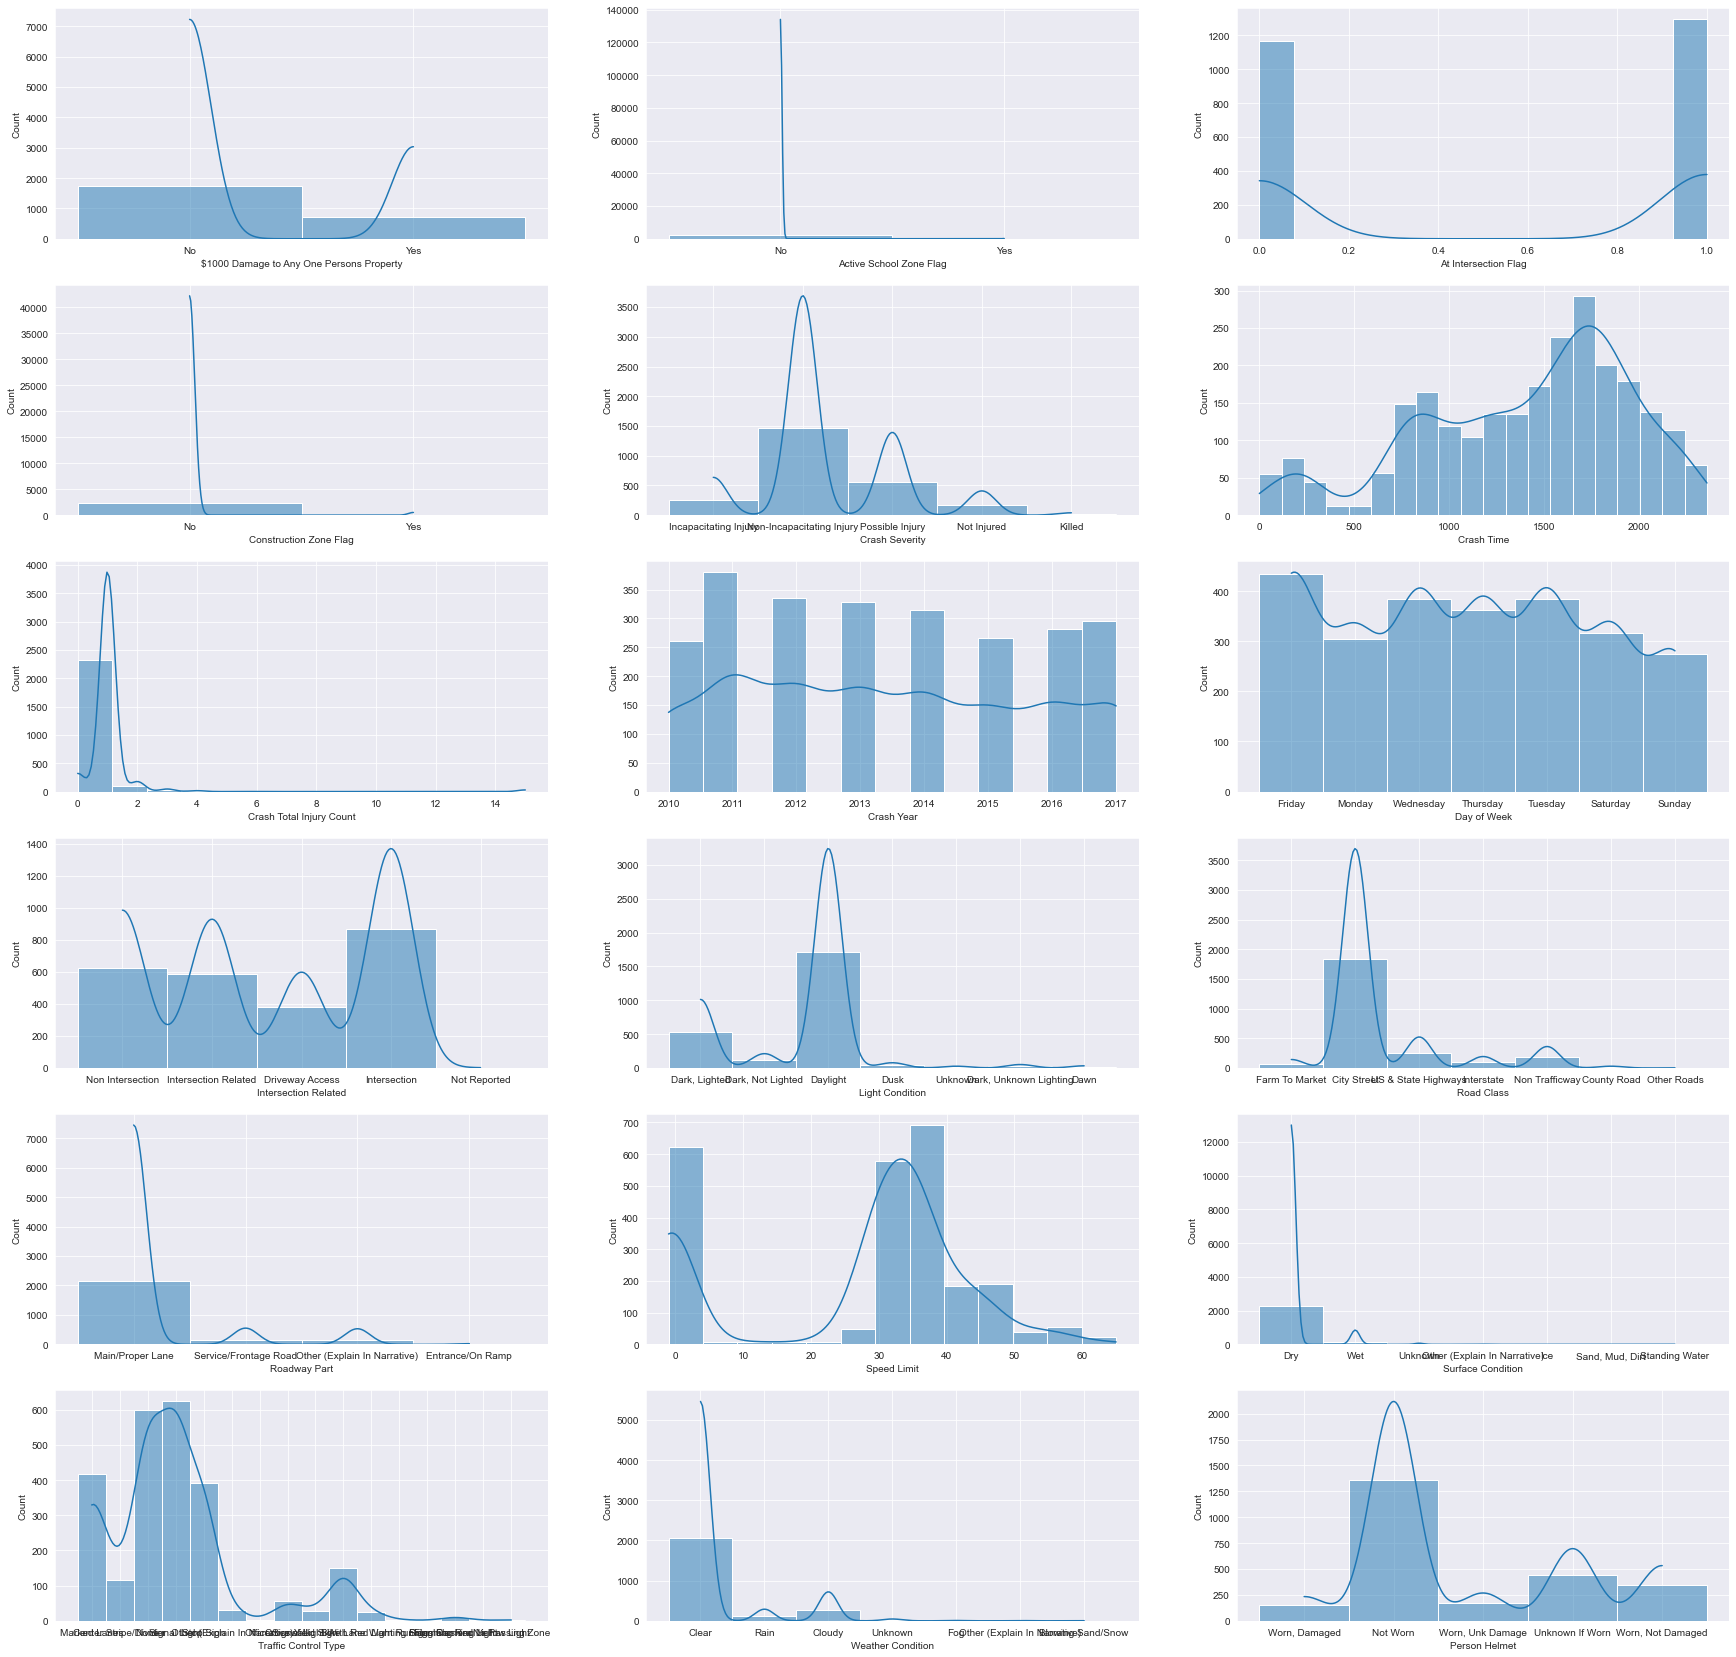

In [304]:
col_numeric = ['$1000 Damage to Any One Persons Property','Active School Zone Flag','At Intersection Flag','Construction Zone Flag','Crash Severity','Crash Time','Crash Total Injury Count','Crash Year','Day of Week','Intersection Related','Light Condition','Road Class','Roadway Part','Speed Limit','Surface Condition','Traffic Control Type','Weather Condition','Person Helmet']


fig = 0

plt.figure(figsize=(30,50))
    
for col in col_numeric: 
    fig = fig+1
    plt.subplot(10,3,fig)
    ax = sns.histplot(x = df1[col], palette=("pink"),kde=True)
    plt.xlabel(col)

<AxesSubplot:>

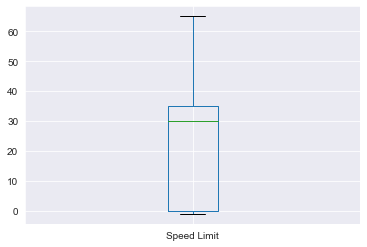

In [305]:
df1.boxplot(column = "Speed Limit")

<AxesSubplot:>

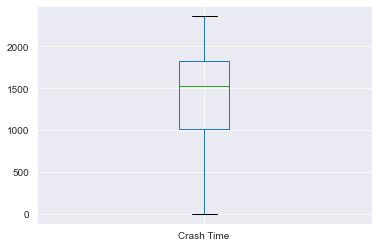

In [306]:
df1.boxplot(column = "Crash Time")

<AxesSubplot:>

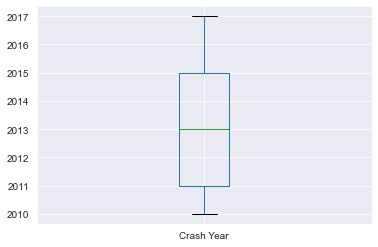

In [307]:
df1.boxplot(column = "Crash Year")

/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crash Year', ylabel='count'>

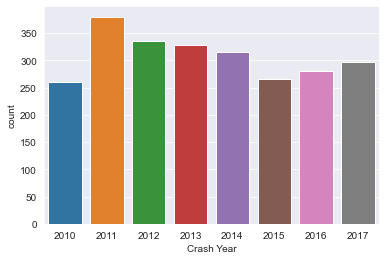

In [308]:
sns.countplot(df1['Crash Year'])

/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crash Time', ylabel='Density'>

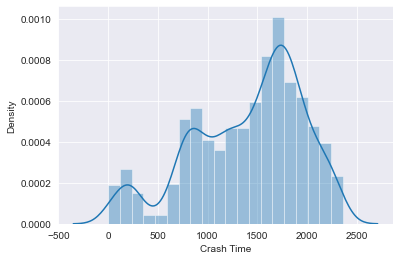

In [309]:
sns.set_style('darkgrid')
sns.distplot(df1['Crash Time'])

In [310]:
df1['Speed Limit'] = np.where(df1['Speed Limit'] == 0,df1['Speed Limit'].mode(),df1['Speed Limit'])


In [311]:
df1['Speed Limit'] = np.where(df1['Speed Limit'] < 0,df1['Speed Limit'].mode(),df1['Speed Limit'])

In [312]:
def categorise(row):  
    if row['Crash Severity'] == "Not Injured" or row['Crash Severity'] == "Non-Incapacitating Injury":
        return 0
    else:
        return 1

In [313]:
df1.head()

,$1000 Damage to Any One Persons Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [314]:
df1['Severity'] = df1.apply(lambda row: categorise(row), axis=1)

In [315]:
df1

,$1000 Damage to Any One Persons Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Severity
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",1
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Daylight,City Street,Main/Proper Lane,40,Dry,Signal Light,Cloudy,Not Worn,0
2459,No,No,True,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2460,No,No,True,No,Not Injured,737,0,2017,Thursday,Intersection Related,Daylight,City Street,Main/Proper Lane,30,Wet,Signal Light,Rain,Not Worn,0
2461,Yes,No,True,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Daylight,City Street,Main/Proper Lane,35,Dry,Stop Sign,Clear,"Worn, Unk Damage",0


In [316]:
for column in df1:
  print(df1[column].value_counts())
  print("---------")

No     1735
Yes     728
Name: $1000 Damage to Any One Persons Property, dtype: int64
---------
No     2460
Yes       3
Name: Active School Zone Flag, dtype: int64
---------
True     1294
False    1169
Name: At Intersection Flag, dtype: int64
---------
No     2433
Yes      30
Name: Construction Zone Flag, dtype: int64
---------
Non-Incapacitating Injury    1474
Possible Injury               556
Incapacitating Injury         254
Not Injured                   163
Killed                         16
Name: Crash Severity, dtype: int64
---------
1830    22
1800    11
1756    10
1749    10
1600    10
        ..
841      1
1408     1
1414     1
1416     1
2049     1
Name: Crash Time, Length: 992, dtype: int64
---------
1     2139
0      176
2       97
3       25
15      16
4        9
6        1
Name: Crash Total Injury Count, dtype: int64
---------
2011    380
2012    336
2013    328
2014    315
2017    296
2016    281
2015    266
2010    261
Name: Crash Year, dtype: int64
---------
Friday      

In [317]:
from sklearn.preprocessing import LabelEncoder
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(df1)

In [318]:
df1['At Intersection Flag'] = np.where(df1['At Intersection Flag'] == True,1,0)


/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crash Severity', ylabel='Density'>

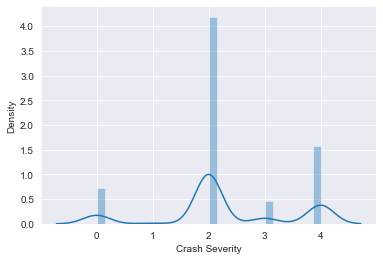

In [319]:
sns.distplot(df1['Crash Severity'])

In [320]:
df1


,$1000 Damage to Any One Persons Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,Severity
0,0,0,0,0,0,239,1,2010,0,3,0,2,1,45,0,6,1,2,1
1,0,0,0,0,2,310,2,2010,0,3,0,0,1,35,0,1,1,0,0
2,0,0,0,0,2,310,2,2010,0,3,0,0,1,35,0,1,1,0,0
3,0,0,0,0,2,310,2,2010,0,3,0,0,1,35,0,1,1,0,0
4,0,0,0,0,2,2300,1,2010,1,2,1,6,1,45,0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,1,0,2,1254,1,2017,5,2,4,0,1,40,0,11,2,0,0
2459,0,0,1,0,2,2048,1,2017,5,3,0,0,1,35,0,1,1,0,0
2460,0,0,1,0,3,737,0,2017,4,2,4,0,1,30,6,11,5,0,0
2461,1,0,1,0,2,930,1,2017,0,1,4,0,1,35,0,13,1,4,0


In [321]:
for col in df1:
    print(col,": ", df1[col].dtypes)
    print(df1[col].unique())

$1000 Damage to Any One Persons Property :  int64
[0 1]
Active School Zone Flag :  int64
[0 1]
At Intersection Flag :  int64
[0 1]
Construction Zone Flag :  int64
[0 1]
Crash Severity :  int64
[0 2 4 3 1]
Crash Time :  int64
[ 239  310 2300 1408 1715 1826 2104 1814 1124 1605 1739 1435 1618  439
 1742 1651  722  758 1658 1315 1216 1945 1126 1840 1152 1543 1654  650
  230 1734 1541 1420 1737 1136  608 1325 2326 2025 1140 2123 1753  227
 1934 1711 2045 1442  107 1621 2129 2115 1623 1112 1800 1831 1903 1732
  448  916  104  949  106  837 1402  851 1359 1722  919 1643  940 1941
 1154 1813 1239 1825 1300 2120 1627 1130 1538 1240 1650 2205 1736 1545
 2119 1404 1600  844 1337 1644 1900 2042  400 1206 1153 1201 1851 1455
 1927 1629 2339 2138   37  307 1743 1029 1256 1051  231  709 1929 2136
 1642 1827  812  939 1514 1915  235 1922 1052 1920 1203 1040 2349  854
 1217 1255  750 1324 2118 2107 1833  715 1339 2250 1449 1210 1727  253
 1720  738  148  225 2055  725 1427 2238 1805 2032 1200  242  724

<AxesSubplot:>

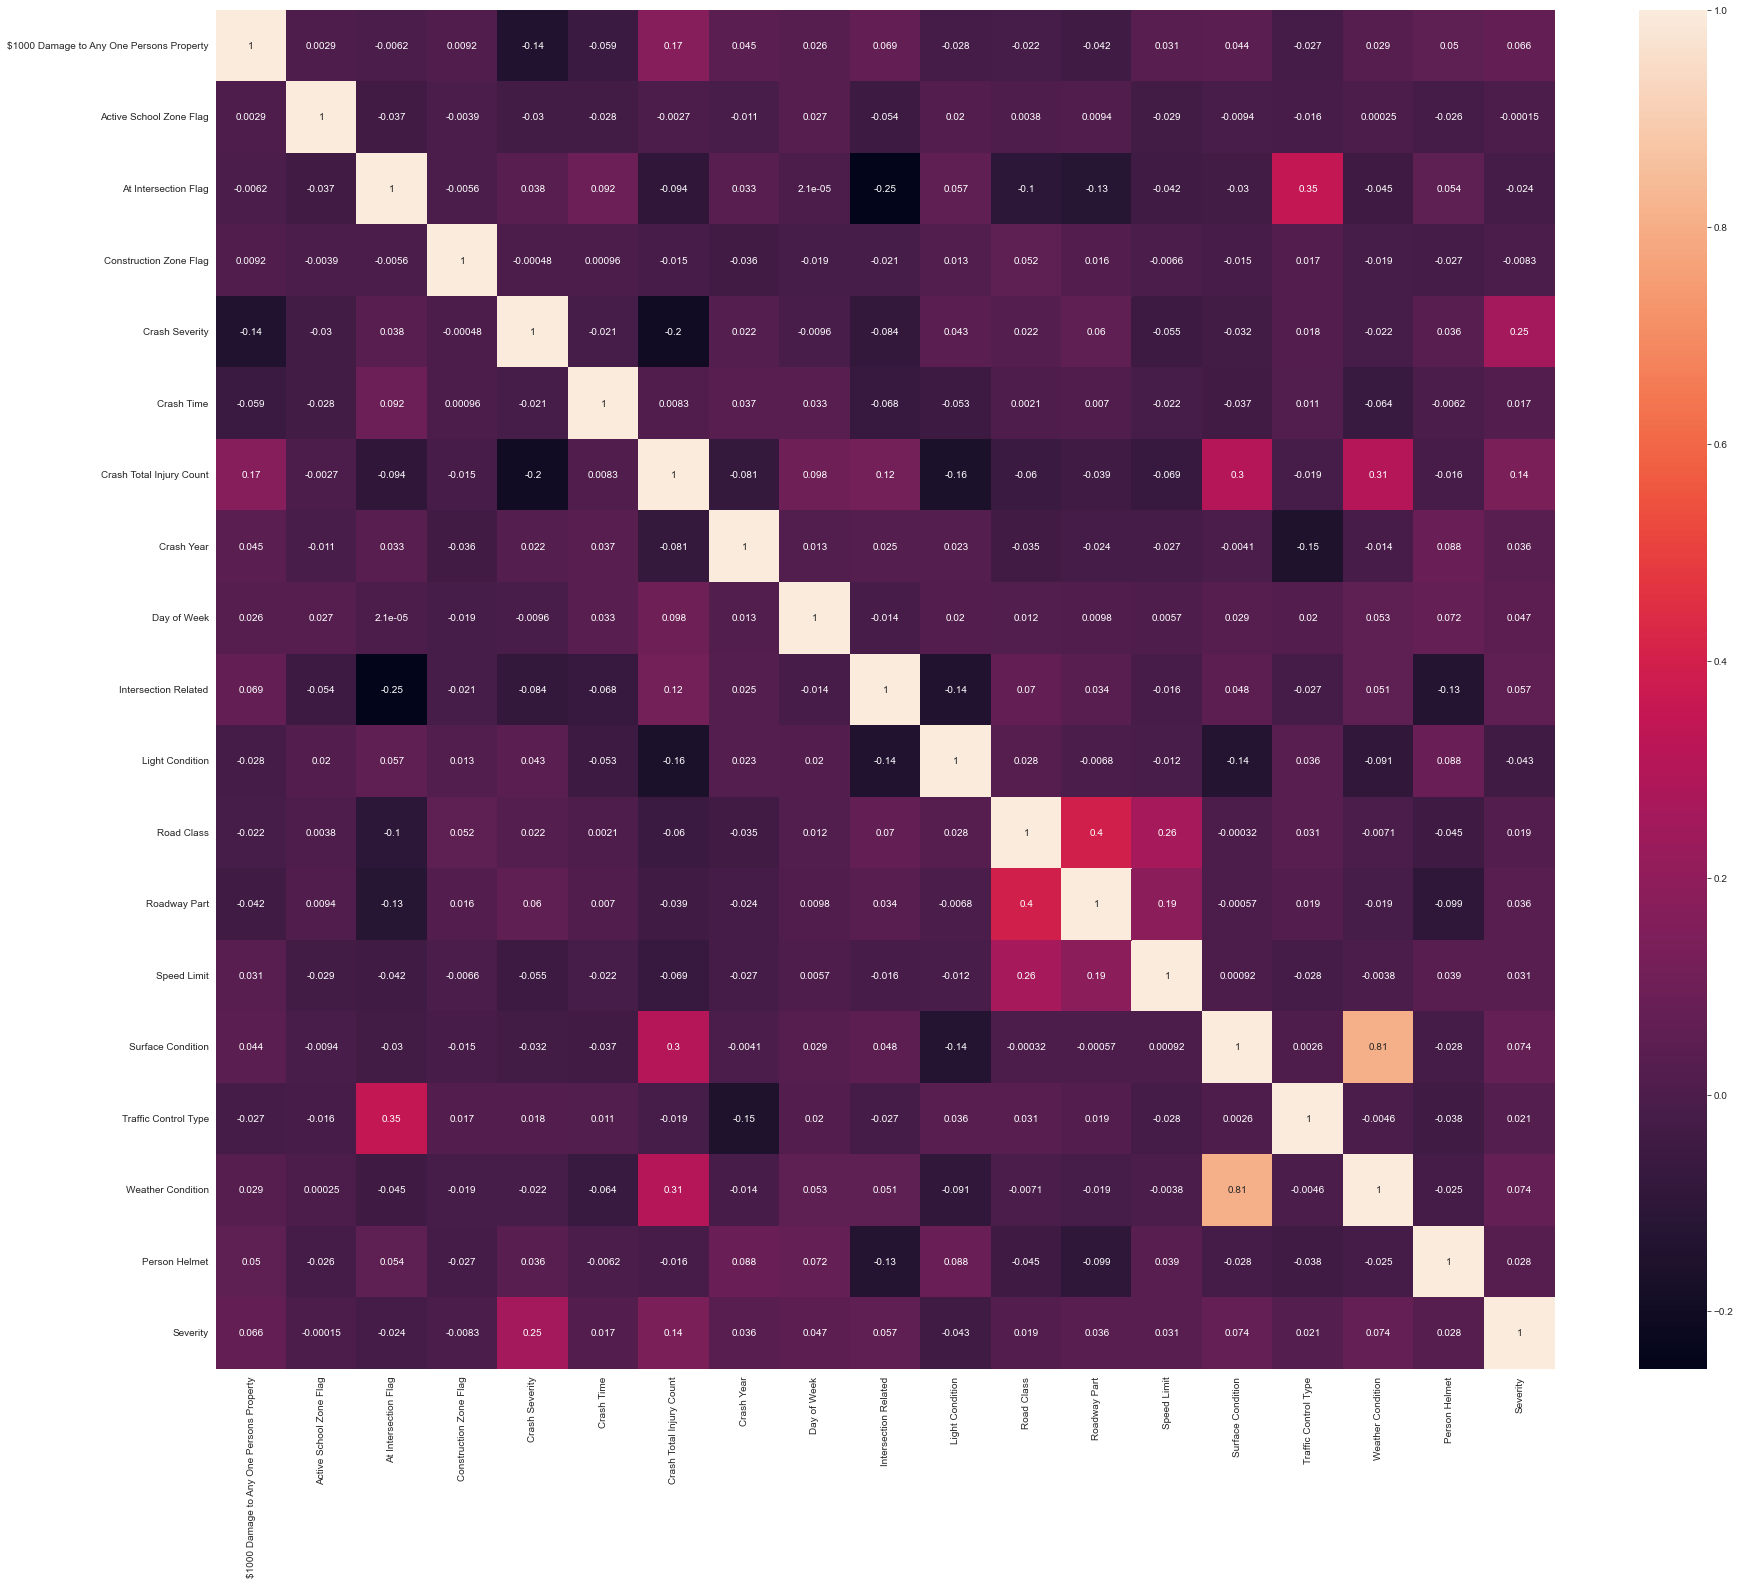

In [322]:
plt.figure(figsize=(30,25))
sns.heatmap(df1.corr(), annot=True)

In [323]:
corr = df1.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[87:110]

Intersection Related                      $1000 Damage to Any One Persons Property    0.068808
$1000 Damage to Any One Persons Property  Intersection Related                        0.068808
Speed Limit                               Crash Total Injury Count                    0.068758
Crash Total Injury Count                  Speed Limit                                 0.068758
Crash Time                                Intersection Related                        0.067822
Intersection Related                      Crash Time                                  0.067822
Severity                                  $1000 Damage to Any One Persons Property    0.065691
$1000 Damage to Any One Persons Property  Severity                                    0.065691
Crash Time                                Weather Condition                           0.063724
Weather Condition                         Crash Time                                  0.063724
Road Class                                Crash To

In [324]:
df1['Severity'].value_counts(normalize=True)

0    0.664637
1    0.335363
Name: Severity, dtype: float64

In [325]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [326]:
x = df1.drop('Severity', axis=1)
y = df1['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [327]:
import statsmodels.api as sm

Xlog2 = sm.add_constant(X_train) 
logr_model = sm.Logit(Y_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.571066
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Severity   No. Observations:                 1724
Model:                          Logit   Df Residuals:                     1705
Method:                           MLE   Df Model:                           18
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.1085
Time:                        15:39:52   Log-Likelihood:                -984.52
converged:                       True   LL-Null:                       -1104.4
Covariance Type:            nonrobust   LLR p-value:                 1.001e-40
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      -52.4

In [328]:
import sklearn.metrics as metrics
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, Y_train)


LogisticRegression(max_iter=10000)

In [329]:
lr_pred = lr.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       498
           1       0.96      0.58      0.72       241

    accuracy                           0.86       739
   macro avg       0.89      0.78      0.81       739
weighted avg       0.87      0.86      0.84       739



In [330]:
cnf_matrix = metrics.confusion_matrix(Y_test, lr_pred)
cnf_matrix

array([[492,   6],
       [101, 140]])

In [331]:
lr.score(X_test, Y_test)

0.8552097428958051

In [332]:
print("Precision:",metrics.precision_score(Y_test, lr_pred))
print("Recall:",metrics.recall_score(Y_test, lr_pred))

Precision: 0.958904109589041
Recall: 0.5809128630705395


In [333]:
auc = metrics.roc_auc_score(Y_test, lr_pred)
auc

0.7844323351497275

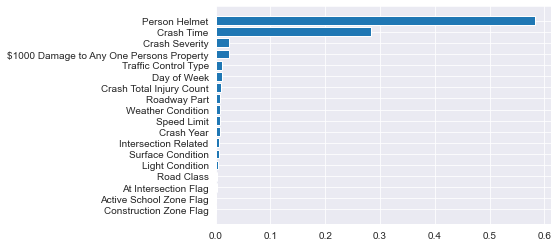

In [334]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [347]:
df1['Crash Severity'].value_counts(normalize=True)

2    0.598457
4    0.225741
0    0.103126
3    0.066179
1    0.006496
Name: Crash Severity, dtype: float64

In [335]:
z = df1[['Crash Severity']]
z['Crash Severity'] = z['Crash Severity'].astype('string')
x = df1.drop('Crash Severity',axis=1)

<ipython-input-335-105e598aafec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Crash Severity'] = z['Crash Severity'].astype('string')


In [336]:
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.3)

In [337]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=5000)   
rf_model.fit(x_train,z_train)

<ipython-input-337-d87344cf3d89>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,z_train)


RandomForestClassifier(max_depth=3, n_estimators=5000, random_state=42)

In [338]:
zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)

0.8876860622462788

In [339]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))


[[  4   0   0   0  80]
 [  0   0   0   0   3]
 [  0   0 440   0   0]
 [  0   0   0  44   0]
 [  0   0   0   0 168]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        84
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00       440
           3       1.00      1.00      1.00        44
           4       0.67      1.00      0.80       168

    accuracy                           0.89       739
   macro avg       0.73      0.61      0.58       739
weighted avg       0.92      0.89      0.85       739



/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [283]:
from sklearn.metrics import confusion_matrix

roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(z_test, zrf_predict[:,1])

NameError: name 'multi_class_series' is not defined

In [289]:
from sklearn.datasets import load_iris
roc_auc_score(z_test, zrf_predict, multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

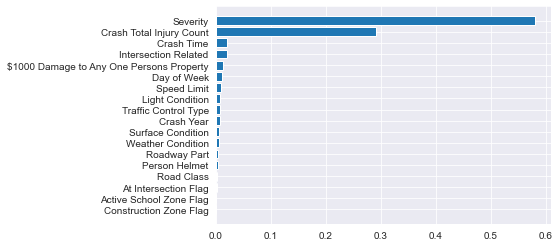

In [341]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [342]:
y = df1[['Crash Severity']]
x = df1.drop('Crash Severity',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [343]:
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_array = sc.fit_transform(x_train.values)

In [344]:
x_train = pd.DataFrame(x_train_array, index=x_train.index, columns=x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index=x_test.index, columns=x_test.columns)

In [345]:
from sklearn.neural_network import MLPClassifier
# Initializing the multilayer perceptron
mlp = MLPClassifier(3,activation="relu",solver='sgd',learning_rate_init= 0.01, max_iter=100, random_state=1)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp.score(x_test,y_test)

/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9106901217861976

In [346]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 14   0   0   0  56]
 [  0   0   0   0   3]
 [  0   0 432   0   1]
 [  0   0   0  62   0]
 [  6   0   0   0 165]]
              precision    recall  f1-score   support

           0       0.70      0.20      0.31        70
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00        62
           4       0.73      0.96      0.83       171

    accuracy                           0.91       739
   macro avg       0.69      0.63      0.63       739
weighted avg       0.91      0.91      0.89       739



/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [277]:
auc = metrics.roc_auc_score(y_test, y_pred)
auc

ValueError: multi_class must be in ('ovo', 'ovr')